In this notebook, I first load in an excel file of data showing some basic information on countries from 1851 and 1876, such as GDP, population, and patent length in that country. The file also contains the number of exhibits that each of the given countries brought to the 1851 and 1876 world's fairs sorted by industry of the exhibit. The goal of this file is to display any relationships between the patent length of a country and innovation. Here I display the relationship as a scatter plot showing the relationship of a country's patent length versus total exhibits, a scatter plot showing the relationship of patent length to the industries that a country focuses innovation in, and a regression for each year to show how much impact patent length has on a countries number of total exhibits.

In [51]:
import pandas as pd #Used to create data frame
import numpy as np #Used for math functions
import matplotlib.pyplot as plt #Used to plot graphs
%matplotlib inline 
import statsmodels.api as sm #Used for my regressions

The first function I perform below is loading in the data and displaying it.

In [52]:
data=pd.read_excel('/Users/nicholascolloca/Innovation_Economics/worlds_fair_data2.xls')

In [53]:
df1=pd.DataFrame(data)

In [54]:
df1

,country,pleng1851,pop1851,gdpmad1851,gdpmadpc1851,gdpag1851,laborag1851,primary1851,prim5141851,mining1851,...,food1876,mach1876,scinst1876,textiles1876,manu1876,S,T,U,V,W
0,Switzerland,0.0,2379.0,5239.336712,,NaN,NaN,368.0,NaN,2.0,...,24.0,19.0,56.0,38.0,11.0,NaN,NaN,NaN,NaN,NaN
1,Denmark,0.0,1499.0,2549.000000,1700,51.0,59.45,NaN,NaN,0.0,...,21.0,6.0,2.0,7.0,12.0,NaN,NaN,NaN,NaN,NaN
2,Wurttemberg,10.0,1733.0,2557.908000,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Prussia,12.0,16935.0,24996.060000,NaN,45.0,NaN,2525.0,730.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Saxony,12.0,1988.0,2934.288000,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Britain,14.0,25601.0,60479.000000,2362,21.0,28.08,2652.0,555.0,474.0,...,61.0,172.0,48.0,88.0,167.0,NaN,NaN,NaN,NaN,NaN
6,Norswe,15.0,4875.0,5993.000000,1229.333333333333,NaN,52.52,658.0,615.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Belgium,15.0,4449.0,8042.000000,1808,NaN,53.50,487.0,549.0,36.0,...,18.0,37.0,7.0,61.0,61.0,NaN,NaN,NaN,NaN,NaN
8,Bavaria,15.0,4599.0,6788.124000,NaN,NaN,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,France,15.0,36350.0,60685.000000,1669,38.0,53.00,3322.0,515.0,26.0,...,194.0,171.0,82.0,174.0,248.0,NaN,NaN,NaN,NaN,NaN


In [55]:
df1.columns

Index(['country', 'pleng1851', 'pop1851', 'gdpmad1851', 'gdpmadpc1851',
       'gdpag1851', 'laborag1851', 'primary1851', 'prim5141851', 'mining1851',
       'chemicals1851', 'food1851', 'mach1851', 'scinst1851', 'textiles1851',
       'manu1851', 'pleng1876', 'pop1876', 'gdpmad1876', 'gdpmadpc1876',
       'gdpag1876', 'laborag1876', 'primary1876', 'prim5141876', 'mining1876',
       'chemicals1876', 'food1876', 'mach1876', 'scinst1876', 'textiles1876',
       'manu1876', 'S', 'T', 'U', 'V', 'W'],
      dtype='object')

I next create variables to represent the total number of exhibits for a country in a given year and then append that data as new columns to the data frame.

In [58]:
total_exhibits1851=[]
for i in range(len(df1)):
    total_exhibits1851.append(sum(df1.loc[i][['mining1851','chemicals1851','food1851','mach1851','scinst1851',
                                              'textiles1851','manu1851']]))

In [59]:
total_exhibits1876=[]
for i in range(len(df1)):
    total_exhibits1876.append(sum(df1.loc[i][['mining1876','chemicals1876','food1876','mach1876','scinst1876',
                                              'textiles1876','manu1876']]))

In [60]:
total_exhibits1851

[243.0,
 34.0,
 105.0,
 803.0,
 169.0,
 6115.0,
 111.0,
 462.0,
 87.0,
 1529.0,
 276.0,
 110.0,
 669.0,
 nan,
 nan,
 nan]

In [61]:
total_exhibits1876

[158.0,
 57.0,
 nan,
 nan,
 nan,
 683.0,
 nan,
 222.0,
 nan,
 1004.0,
 3058.0,
 181.0,
 346.0,
 672.0,
 182.0,
 372.0]

In [62]:
df1['Total_Exhibits1851']=total_exhibits1851

In [63]:
df1['Total_Exhibits1876']=total_exhibits1876

In [64]:
df1['country']

0     Switzerland
1         Denmark
2     Wurttemberg
3         Prussia
4          Saxony
5         Britain
6          Norswe
7         Belgium
8         Bavaria
9          France
10          Spain
11    Netherlands
12        Austria
13        Germany
14         Norway
15         Sweden
Name: country, dtype: object

In [65]:
df1.sort_values('pleng1876')

,country,pleng1851,pop1851,gdpmad1851,gdpmadpc1851,gdpag1851,laborag1851,primary1851,prim5141851,mining1851,...,scinst1876,textiles1876,manu1876,S,T,U,V,W,Total_Exhibits1851,Total_Exhibits1876
0,Switzerland,0.0,2379.0,5239.336712,,NaN,NaN,368.0,NaN,2.0,...,56.0,38.0,11.0,NaN,NaN,NaN,NaN,NaN,243.0,158.0
11,Netherlands,15.0,3095.0,5844.000000,1888,NaN,44.67,369.0,541.0,1.0,...,14.0,35.0,22.0,NaN,NaN,NaN,NaN,NaN,110.0,181.0
14,Norway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,15.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,182.0
15,Sweden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,43.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,372.0
1,Denmark,0.0,1499.0,2549.000000,1700,51.0,59.45,NaN,NaN,0.0,...,2.0,7.0,12.0,NaN,NaN,NaN,NaN,NaN,34.0,57.0
5,Britain,14.0,25601.0,60479.000000,2362,21.0,28.08,2652.0,555.0,474.0,...,48.0,88.0,167.0,NaN,NaN,NaN,NaN,NaN,6115.0,683.0
9,France,15.0,36350.0,60685.000000,1669,38.0,53.00,3322.0,515.0,26.0,...,82.0,174.0,248.0,NaN,NaN,NaN,NaN,NaN,1529.0,1004.0
10,Spain,15.0,14779.0,16949.000000,1147,NaN,69.91,NaN,401.0,43.0,...,8.0,359.0,91.0,NaN,NaN,NaN,NaN,NaN,276.0,3058.0
12,Austria,15.0,3950.0,6563.000000,1661,NaN,52.29,2326.0,389.0,47.0,...,24.0,59.0,138.0,NaN,NaN,NaN,NaN,NaN,669.0,346.0
13,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.0,107.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN,672.0


Next I perform the main focus of the project, displaying the data. I use 5 scatter plots and 2 regressions to show the relationship between patent length and innovation.

/Users/nicholascolloca/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/nicholascolloca/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/nicholascolloca/anaconda3/lib/python3.5/site-packages/matplotlib/transforms.py:737: RuntimeWarning: invalid value encountered in maximum
  x0 = np.maximum(bbox1.xmin, bbox2.xmin)
/Users/nicholascolloca/anaconda3/lib/python3.5/site-packages/matplotlib/transforms.py:738: RuntimeWarning: invalid value encountered in minimum
  x1 = np.minimum(bbox1.xmax, bbox2.xmax)
/Users/nicholascolloca/anaconda3/lib/python3.5/site-packages/matplotlib/transforms.py:739: RuntimeWarning: invalid value encountered in maximum
  y0 = np.maximum(bbox1.ymin, bbox2.ymin)
/Users/nicholascolloca/anaconda3/lib/python3.5/site-packages

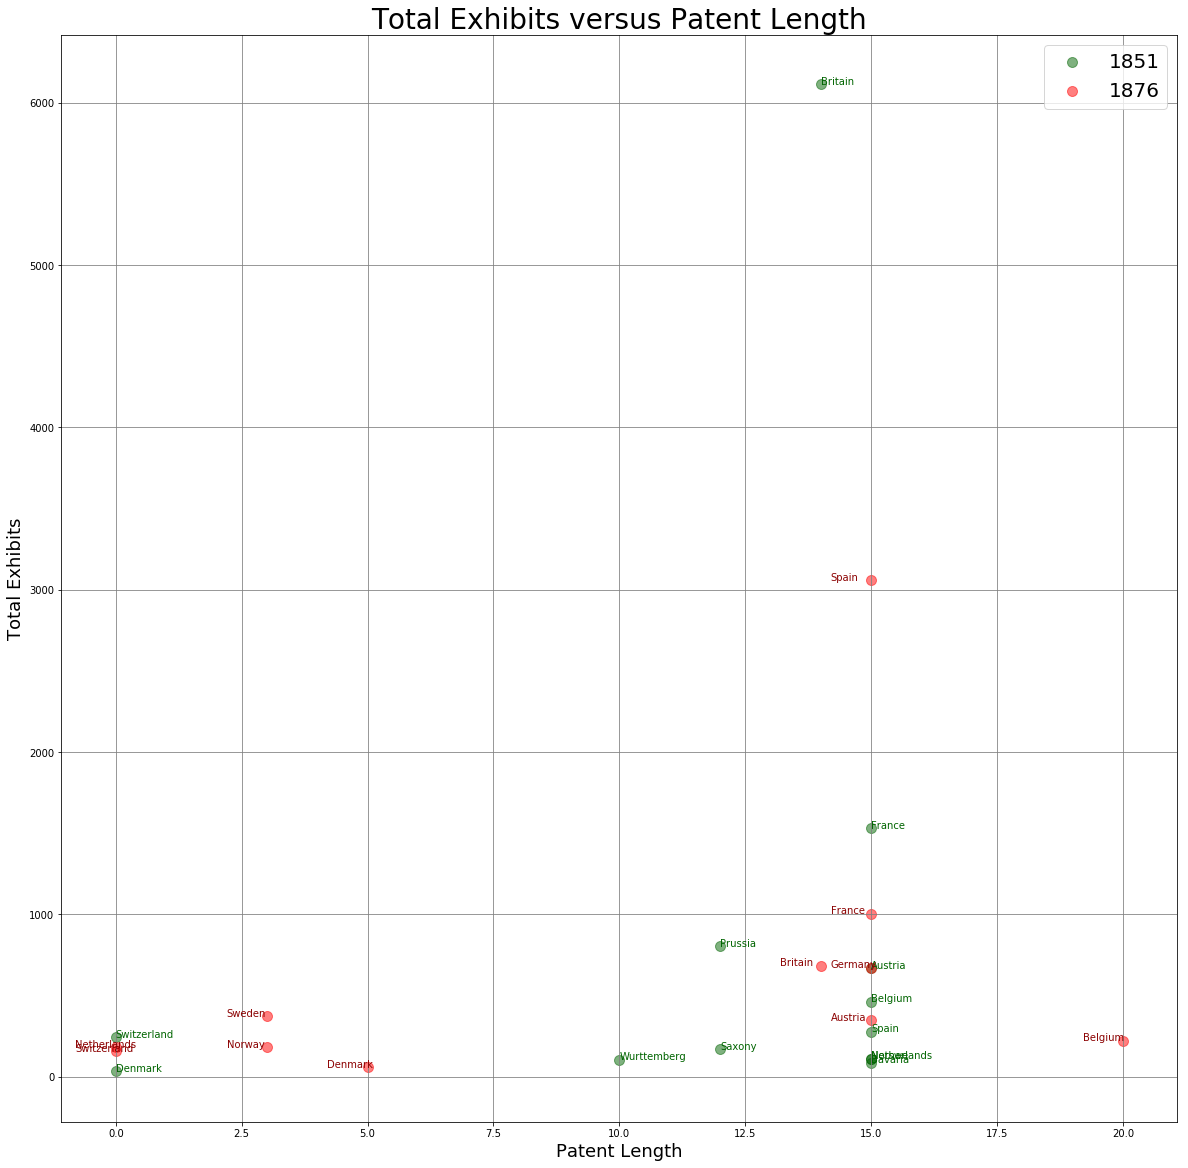

In [66]:
fig, ax =plt.subplots(1,figsize=(20,20))
ax.scatter(y=df1['Total_Exhibits1851'],x=df1['pleng1851'].astype(float),data=df1.dropna(),s=100,
          color='DarkGreen',label='1851',alpha=.5)

ax.scatter(y=df1['Total_Exhibits1876'],x=df1['pleng1876'].astype(float),data=df1.dropna(),s=100,
          color='Red',label='1876',alpha=.5)

ax.set_xlabel('Patent Length',fontsize=18)
ax.set_ylabel('Total Exhibits',fontsize=18)
ax.set_title('Total Exhibits versus Patent Length',fontsize=28)
ax.grid(color='gray')

for i in range(len(df1['pleng1851'].dropna())):
    ax.annotate(df1['country'].iloc[i],
                xy=(df1['pleng1851'].iloc[i],
                    df1['Total_Exhibits1851'].iloc[i]),clip_on=True,color='DarkGreen')
    
for i in range(len(df1.sort_values(['pleng1876']))):
    ax.annotate(df1.sort_values(['pleng1876'])['country'].iloc[i],
                xy=(df1.sort_values(['pleng1876'])['pleng1876'].iloc[i]-.8,
                    df1.sort_values(['pleng1876'])['Total_Exhibits1876'].iloc[i]),clip_on=True,color='DarkRed')

ax.legend(prop={'size': 20})

The graph above shows each country in the dataset's Total number of exhibits graphed against patent length in that country for the 1851 and 1876. There are so few data points on the low end of the spectrum for patent length that one would not be able to say for certain that shorter patent length leads to less innovation. One also sees that with the exception of several outliers countries bring less than 1000 exhibits to the fair regardless of the patent length in that country.

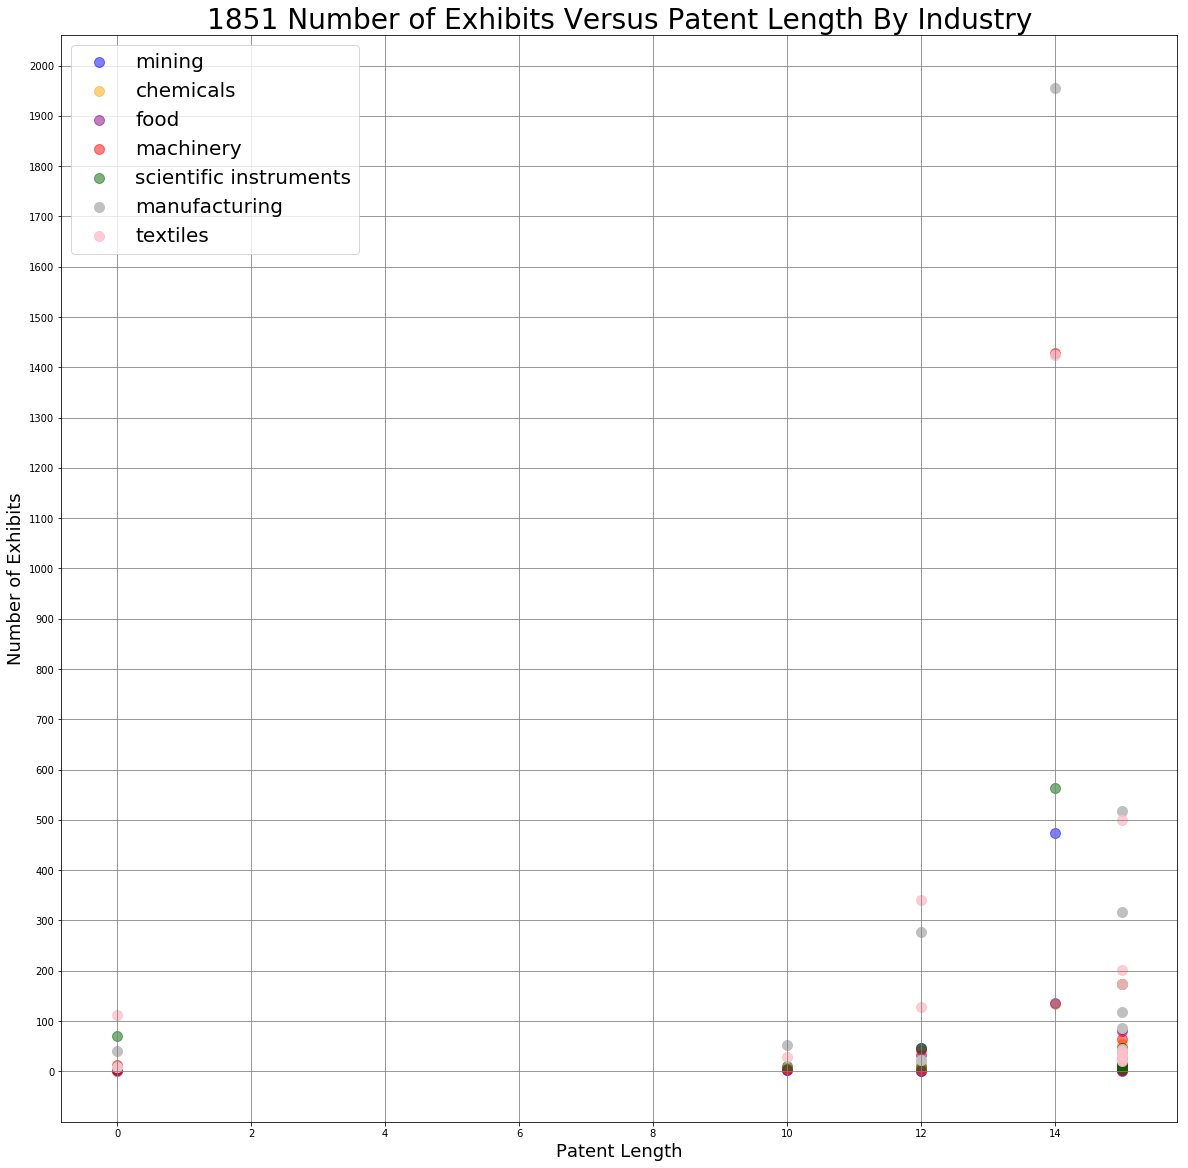

In [67]:
fig, ax=plt.subplots(1,figsize=(20,20))

ax.scatter(x=df1['pleng1851'], y=df1['mining1851'].astype(float),data=df1,s=100,
          color='blue',alpha=.5, label='mining')

ax.scatter(x=df1['pleng1851'], y=df1['chemicals1851'].astype(float),data=df1,s=100,
          color='Orange',alpha=.5, label='chemicals')

ax.scatter(x=df1['pleng1851'], y=df1['food1851'].astype(float),data=df1,s=100,
          color='purple',alpha=.5, label='food')

ax.scatter(x=df1['pleng1851'], y=df1['mach1851'].astype(float),data=df1,s=100,
          color='red',alpha=.5, label='machinery')

ax.scatter(x=df1['pleng1851'], y=df1['scinst1851'].astype(float),data=df1,s=100,
          color='DarkGreen',alpha=.5, label='scientific instruments')

ax.scatter(x=df1['pleng1851'], y=df1['manu1851'].astype(float),data=df1,s=100,
          color='silver',alpha=1, label='manufacturing')

ax.scatter(x=df1['pleng1851'], y=df1['textiles1851'].astype(float),data=df1,s=100,
          color='pink',alpha=.8, label='textiles')

plt.yticks(np.arange(0, 2100, 100))

ax.grid(color='gray')

ax.set_title('1851 Number of Exhibits Versus Patent Length By Industry', fontsize=28)
ax.set_xlabel('Patent Length',fontsize=18)
ax.set_ylabel('Number of Exhibits',fontsize=18)

ax.legend(prop={'size': 20})

This graph shows the number of exhibits for each industry graphed against the patent length of the country who brought those exhibits in 1851. For example, the pink data points at 0 patent length represent the number of textile exhibits brought to the worlds fair by countries who do not have patents. From this graph we see that manufacturing and textiles account for most of the outliers in the data set. The data points at 14 may seem to be unusually high, and that is because those are from Britain who hosted the worlds fair that year and brought by far the most exhibits, as seen in the previous graph. The next graph will zoom in on the data points between 0 and 100 exhibits to better display the data without outliers.

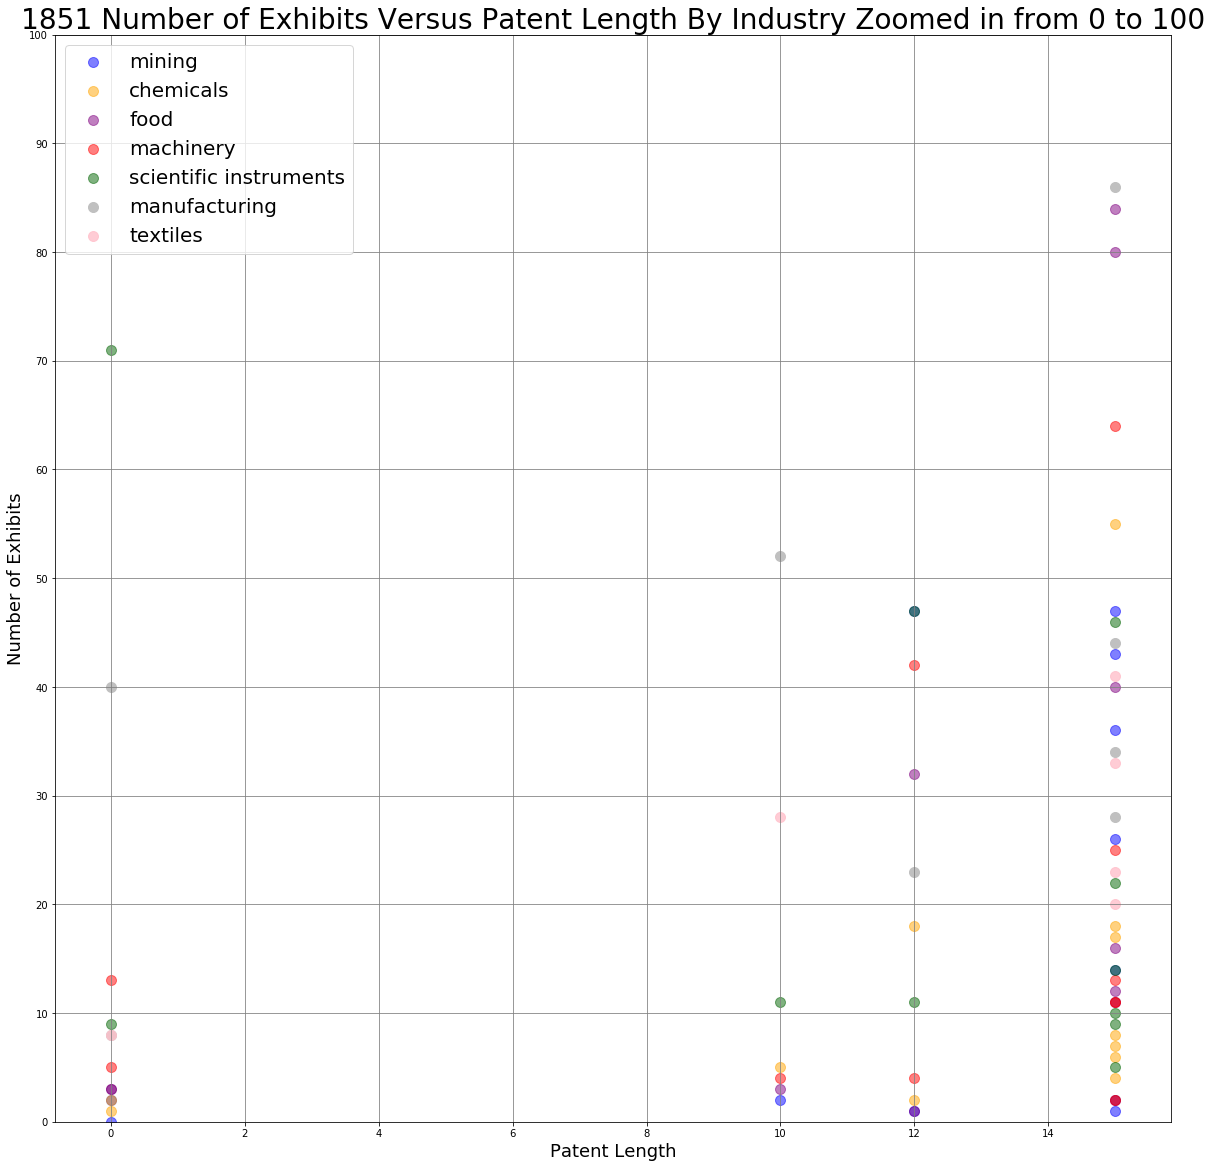

In [68]:
fig, ax=plt.subplots(1,figsize=(20,20))

ax.scatter(x=df1['pleng1851'], y=df1['mining1851'].astype(float),data=df1,s=100,
          color='blue',alpha=.5, label='mining')

ax.scatter(x=df1['pleng1851'], y=df1['chemicals1851'].astype(float),data=df1,s=100,
          color='Orange',alpha=.5, label='chemicals')

ax.scatter(x=df1['pleng1851'], y=df1['food1851'].astype(float),data=df1,s=100,
          color='purple',alpha=.5, label='food')

ax.scatter(x=df1['pleng1851'], y=df1['mach1851'].astype(float),data=df1,s=100,
          color='red',alpha=.5, label='machinery')

ax.scatter(x=df1['pleng1851'], y=df1['scinst1851'].astype(float),data=df1,s=100,
          color='DarkGreen',alpha=.5, label='scientific instruments')

ax.scatter(x=df1['pleng1851'], y=df1['manu1851'].astype(float),data=df1,s=100,
          color='silver',alpha=1, label='manufacturing')

ax.scatter(x=df1['pleng1851'], y=df1['textiles1851'].astype(float),data=df1,s=100,
          color='pink',alpha=.8, label='textiles')

plt.yticks(np.arange(0, 2100, 10))
ax.set_ylim(0,100)

ax.grid(color='gray')

ax.set_title('1851 Number of Exhibits Versus Patent Length By Industry Zoomed in from 0 to 100', fontsize=28)
ax.set_xlabel('Patent Length',fontsize=18)
ax.set_ylabel('Number of Exhibits',fontsize=18)

ax.legend(prop={'size': 20})

This graph shows the same data as the previous graph, but it is zoomed in to show the number of exhibits from 0 to 100. In this graph it is difficult to take these findings as facts because there are so few datapoints. One sees that countries with longer patent lengths have diversified the industries that they brought exhibits in, while shorter patent length countries brought the majority of their exhibits in the three exhibits shown in this graph and textiles as shown in the above graph. There were less than 10 innovations for both of the two countries with no patent laws in the industries of food, chemicals and mining.

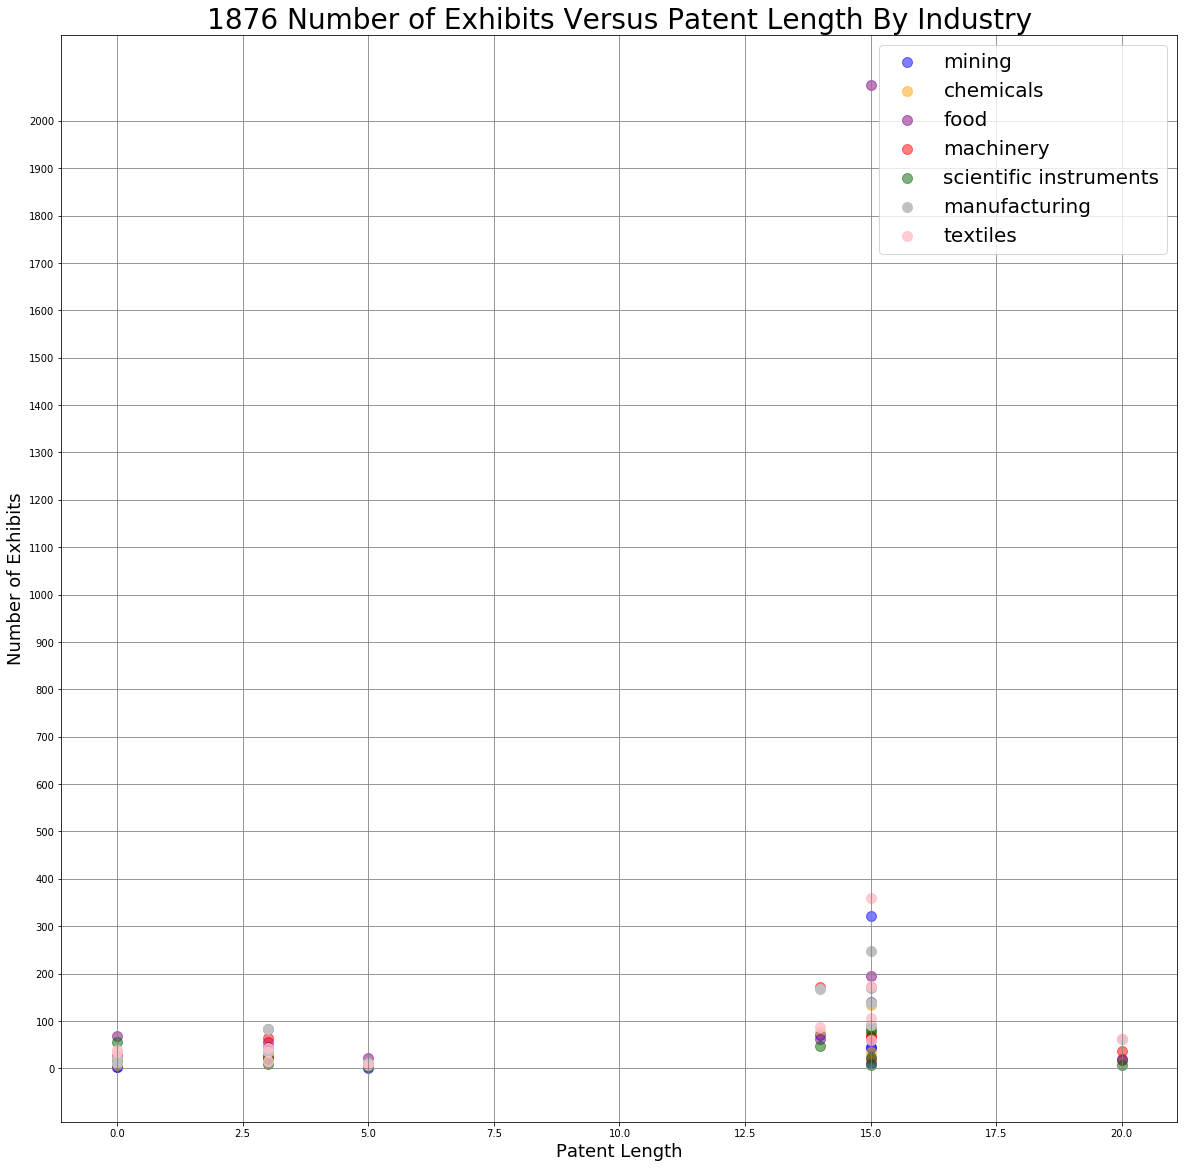

In [69]:
fig, ax=plt.subplots(1,figsize=(20,20))

ax.scatter(x=df1['pleng1876'], y=df1['mining1876'].astype(float),data=df1,s=100,
          color='blue',alpha=.5, label='mining')

ax.scatter(x=df1['pleng1876'], y=df1['chemicals1876'].astype(float),data=df1,s=100,
          color='Orange',alpha=.5, label='chemicals')

ax.scatter(x=df1['pleng1876'], y=df1['food1876'].astype(float),data=df1,s=100,
          color='purple',alpha=.5, label='food')

ax.scatter(x=df1['pleng1876'], y=df1['mach1876'].astype(float),data=df1,s=100,
          color='red',alpha=.5, label='machinery')

ax.scatter(x=df1['pleng1876'], y=df1['scinst1876'].astype(float),data=df1,s=100,
          color='DarkGreen',alpha=.5, label='scientific instruments')

ax.scatter(x=df1['pleng1876'], y=df1['manu1876'].astype(float),data=df1,s=100,
          color='silver',alpha=1, label='manufacturing')

ax.scatter(x=df1['pleng1876'], y=df1['textiles1876'].astype(float),data=df1,s=100,
          color='pink',alpha=.8, label='textiles')

plt.yticks(np.arange(0, 2100, 100))

ax.set_title('1876 Number of Exhibits Versus Patent Length By Industry', fontsize=28)
ax.set_xlabel('Patent Length',fontsize=18)
ax.set_ylabel('Number of Exhibits',fontsize=18)

ax.grid(color='gray')

ax.legend(prop={'size': 20})

This graph shows the number of exhibits for each industry graphed against the patent length of the country who brought those exhibits in 1876. For example, the pink data points at 0 patent length represent the number of textile exhibits brought to the worlds fair by countries who do not have patents. From this graph we see that just as in the 1851 graph the majority of data points fall below 100 exhibits regardless of patent length. Here we again struggle with a lack of datapoints to make any definintive statements. There is also one country(Spain) who brought over 2000 food exhibits. With this outlier taken out no other country had an industry with more than 400 exhibits. Again, the next graph will show the data points that fall between 0 and 100 total exhibits.

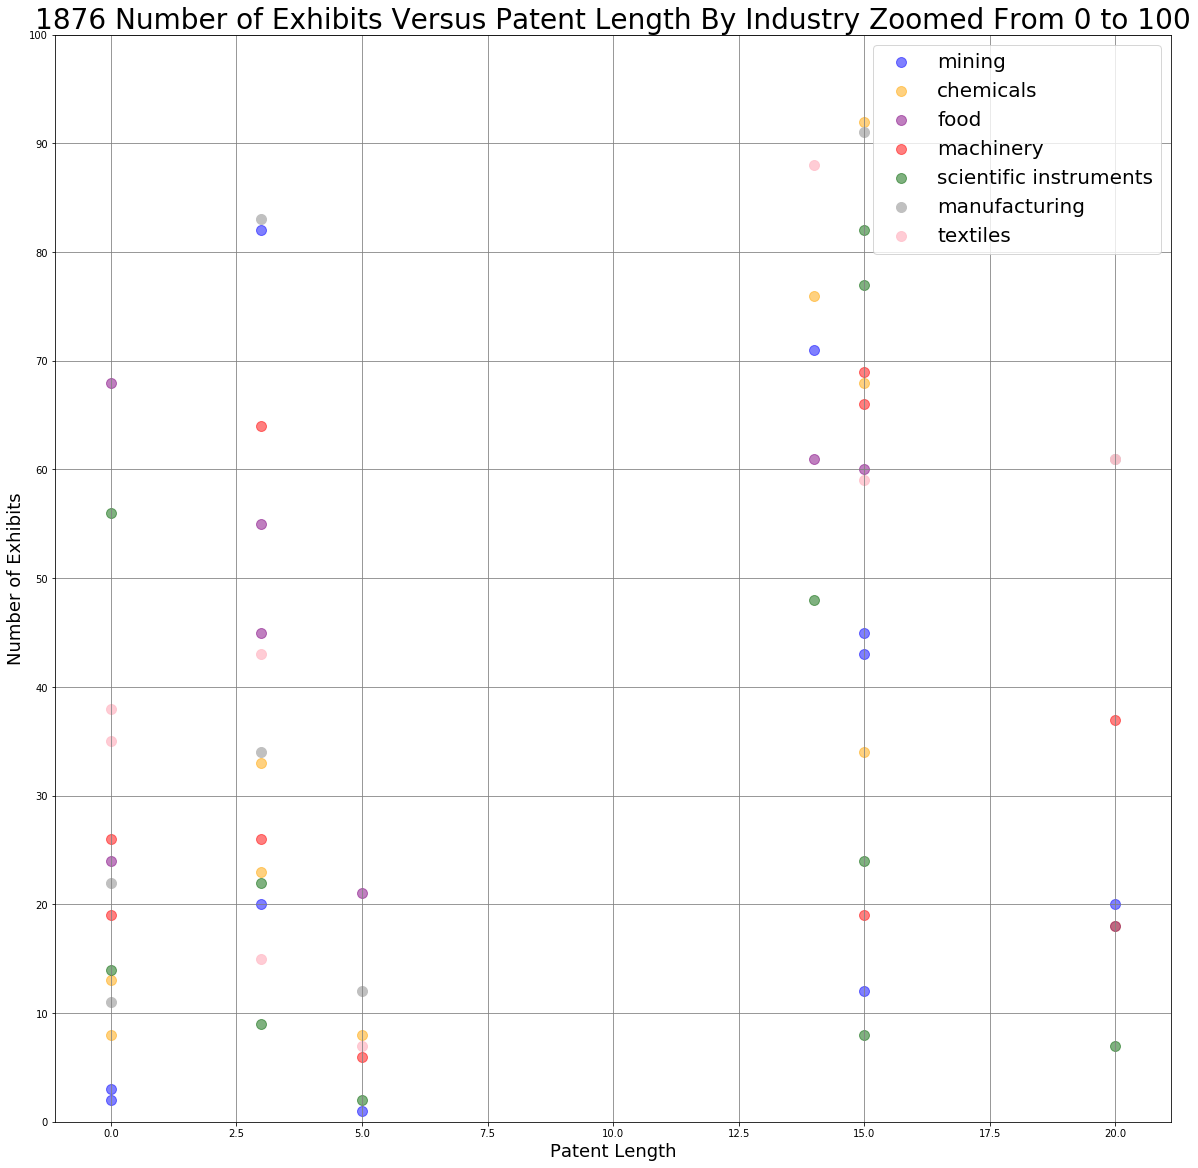

In [70]:
fig, ax=plt.subplots(1,figsize=(20,20))

ax.scatter(x=df1['pleng1876'], y=df1['mining1876'].astype(float),data=df1,s=100,
          color='blue',alpha=.5, label='mining')

ax.scatter(x=df1['pleng1876'], y=df1['chemicals1876'].astype(float),data=df1,s=100,
          color='Orange',alpha=.5, label='chemicals')

ax.scatter(x=df1['pleng1876'], y=df1['food1876'].astype(float),data=df1,s=100,
          color='purple',alpha=.5, label='food')

ax.scatter(x=df1['pleng1876'], y=df1['mach1876'].astype(float),data=df1,s=100,
          color='red',alpha=.5, label='machinery')

ax.scatter(x=df1['pleng1876'], y=df1['scinst1876'].astype(float),data=df1,s=100,
          color='DarkGreen',alpha=.5, label='scientific instruments')

ax.scatter(x=df1['pleng1876'], y=df1['manu1876'].astype(float),data=df1,s=100,
          color='silver',alpha=1, label='manufacturing')

ax.scatter(x=df1['pleng1876'], y=df1['textiles1876'].astype(float),data=df1,s=100,
          color='pink',alpha=.8, label='textiles')

plt.yticks(np.arange(0, 2100, 10))
ax.set_ylim(0,100)

ax.set_title('1876 Number of Exhibits Versus Patent Length By Industry Zoomed From 0 to 100', fontsize=28)
ax.set_xlabel('Patent Length',fontsize=18)
ax.set_ylabel('Number of Exhibits',fontsize=18)

ax.grid(color='gray')

ax.legend(prop={'size': 20})

This graph shows the same data as the previous graph, but it is zoomed in to show the number of exhibits from 0 to 100. In this graph it is difficult to take these findings as facts because there are so few datapoints. One sees that just as in 1851 countries with longer patent lengths have diversified the industries that they brought exhibits in, while shorter patent length countries continued to avoid chemicals and mining with the exception of one mining outlier. Because there are only 5 countries with a patent length of 5 or less it is not possible to definitively say that these industries would see more innovation in countries with patent laws.

In [71]:
reg1 = sm.OLS(endog=df1[['Total_Exhibits1851']].astype(float), exog=(df1[['pleng1851']]).astype(float),
              missing='drop')

In [72]:
results=reg1.fit()

In [73]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Exhibits1851   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     3.844
Date:                Wed, 19 Sep 2018   Prob (F-statistic):             0.0736
Time:                        12:58:11   Log-Likelihood:                -113.95
No. Observations:                  13   AIC:                             229.9
Df Residuals:                      12   BIC:                             230.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pleng1851     68.0797     34.724      1.961      0.0

/Users/nicholascolloca/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


from this regression we see that patent length explains about 24% of the variablity in number of total exhibits for a country in 1851. This seems low to me. The function that the regression creates is (Total Exhibits=68.0797 * patent length)

In [74]:
reg2 = sm.OLS(endog=df1[['Total_Exhibits1876']].astype(float), exog=(df1[['pleng1876']]).astype(float),
              missing='drop')

In [75]:
results1=reg2.fit()

In [76]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Exhibits1876   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     8.955
Date:                Wed, 19 Sep 2018   Prob (F-statistic):             0.0135
Time:                        12:58:11   Log-Likelihood:                -88.406
No. Observations:                  11   AIC:                             178.8
Df Residuals:                      10   BIC:                             179.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pleng1876     59.8759     20.009      2.992      0.0

/Users/nicholascolloca/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


from this regression we see that patent length explains almost 50% of the variablity in number of total exhibits for a country in 1876. This is a significant improvement over 1851, but one must keep in mind the lack of data points taht are available. The function that the regression creates is (Total Exhibits=59.8759 * patent length)